In [ ]:
import wandb
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
api = wandb.Api()
entity, project = "s232958-danmarks-tekniske-universitet-dtu", "Finetuning_on_Meta02"
runs_weighting = api.runs(f"{entity}/{project}")

all_runs_list = [] 
# W&B keys (source)
Keys = ["Non-dimer AUROC",
        "Non-dimer AUPR",
        "Boltzgen Val AUROC",
        "Boltzgen Val AUPR",
        "Bindcraft Val AUROC",
        "Bindcraft Val AUPR",
        "Meta Train-loss",
        "Bindcraft Val Loss",
        "Boltzgen Val Loss",
        "PPInt Val Loss",
        "PPInt Val Accuracy"]
# DataFrame keys (destination)
Keys_names = ["non_dimer_auroc", 
              "non_dimer_aupr", 
              "boltzgen_auroc", 
              "boltzgen_aupr", 
              "bindcraft_auroc", 
              "bindcraft_aupr", 
              "meta_loss", 
              "bindcraft_loss", 
              "boltzgen_loss", 
              "PPint_loss", 
              "PPint_accuracy"]

print(f"Fetching history for {len(runs_weighting)} runs...")

for run in tqdm(runs_weighting):
    # 1. Parse metadata safely
    strategy = run.name
    
    # 2. Initialize the dictionary with lists for ALL expected columns
    run_data = {name: [] for name in Keys_names}
    run_data["epoch"] = []

    # 3. Fetch history
    history = run.scan_history()

    for row in history:
        # Check if this row contains the metrics we care about
        if any(k in row for k in Keys):
            for source_key, dest_name in zip(Keys, Keys_names):
                val = row.get(source_key)
                # Use None/NaN instead of 0 to avoid skewing data
                run_data[dest_name].append(val if val is not None else 0)
            
            # Use the W&B internal step as the epoch/time marker
            run_data["epoch"].append(row.get("_step", 0))

    # 4. Create the temp DataFrame from the populated lists
    temp_df = pd.DataFrame(run_data)
    
    # 5. Add metadata as constant columns for this specific run
    temp_df["strategy"] = strategy    
    all_runs_list.append(temp_df)

# Final concatenation
if all_runs_list:
    Df = pd.concat(all_runs_list, ignore_index=True)
    print(f"Total rows fetched: {len(Df)}")
    # print(Df.head())
else:
    print("No runs found or history empty.")
Df

Fetching history for 3 runs...


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]

Total rows fetched: 39


,non_dimer_auroc,non_dimer_aupr,boltzgen_auroc,boltzgen_aupr,bindcraft_auroc,bindcraft_aupr,meta_loss,bindcraft_loss,boltzgen_loss,PPint_loss,PPint_accuracy,epoch,strategy
0,0.893352,0.668786,0.600146,0.319406,0.509396,0.498846,0.000000,1.184441,0.822580,0.306919,0.888,0,no_weighting
1,0.868201,0.621533,0.477767,0.227105,0.649334,0.592737,0.619621,0.771021,0.815022,0.392476,0.894,1,no_weighting
2,0.839793,0.595457,0.414128,0.205335,0.710454,0.641941,0.543324,0.845167,0.769717,0.375333,0.878,2,no_weighting
3,0.823536,0.571450,0.438445,0.218195,0.706440,0.641053,0.517121,0.996752,0.769180,0.446631,0.870,3,no_weighting
4,0.809627,0.536191,0.446967,0.225079,0.696406,0.655759,0.501913,0.888976,0.803213,0.491088,0.872,4,no_weighting
5,0.836914,0.590044,0.470250,0.222456,0.705711,0.650465,0.490106,0.891095,0.892160,0.379015,0.880,5,no_weighting
6,0.793127,0.525554,0.535198,0.257750,0.704251,0.641062,0.472882,1.213503,0.780336,0.556901,0.866,6,no_weighting
7,0.800642,0.540045,0.462398,0.219988,0.711914,0.664640,0.464320,1.103619,0.965541,0.458129,0.878,7,no_weighting
8,0.820308,0.564987,0.519281,0.258635,0.715016,0.656250,0.457866,1.228138,0.841535,0.548092,0.882,8,no_weighting
9,0.784067,0.516864,0.450041,0.223776,0.717387,0.690686,0.449048,1.162273,0.850953,0.580290,0.872,9,no_weighting


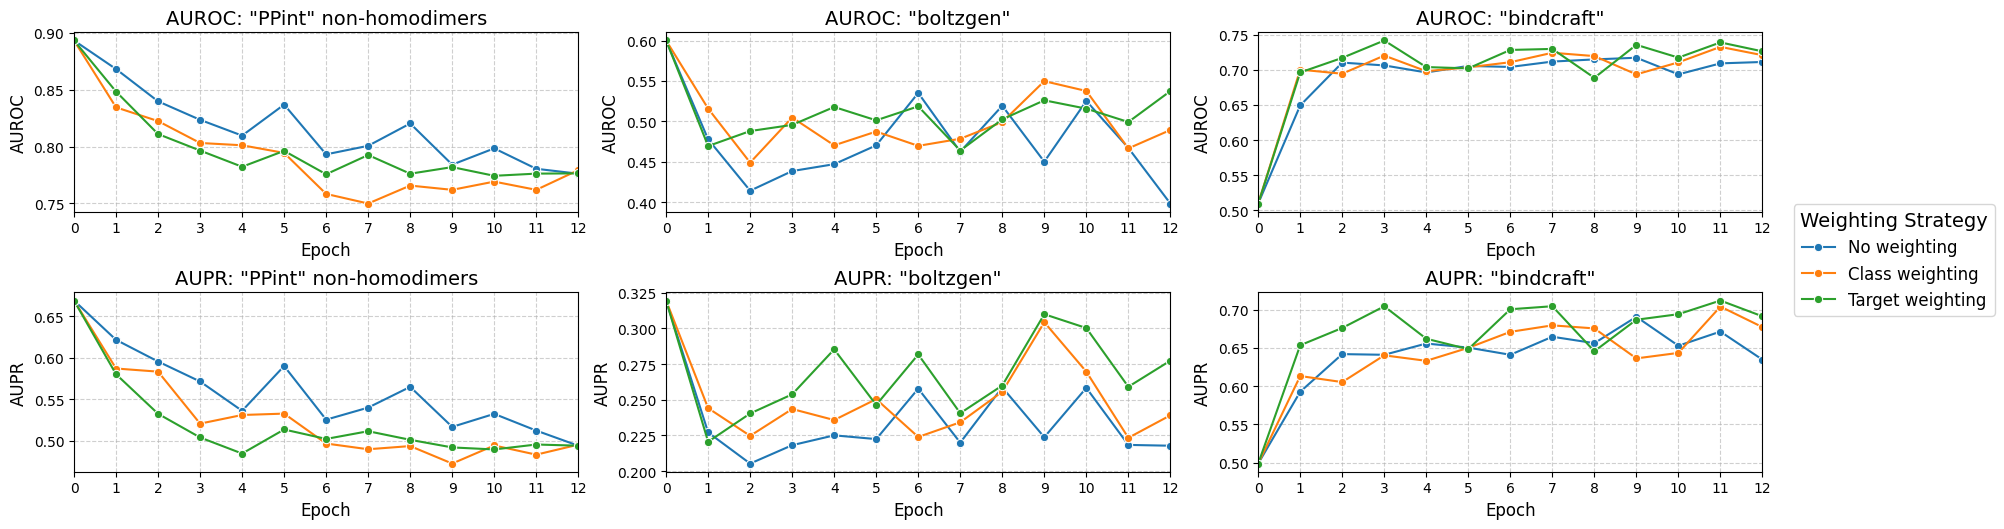

In [3]:
# Apply labeling
names = {
    "class_weighting" : "Class weighting",
    "target_weighting" : "Target weighting",
    "no_weighting": "No weighting"
}

Df['Strategy_Label'] = Df['strategy'].map(names)

# Create a 2x3 grid: Row 1 = AUROC, Row 2 = AUPR
fig, axes = plt.subplots(2, 3, figsize=(18, 6))

# Define the datasets (Columns)
datasets = [
    ('non_dimer', '"PPint" non-homodimers'),
    ('boltzgen', '"boltzgen"'),
    ('bindcraft', '"bindcraft"')
]

for col_idx, (prefix, title) in enumerate(datasets):
    
    # --- ROW 1: AUROC ---
    sns.lineplot(
        ax=axes[0, col_idx], data=Df, x='epoch', y=f'{prefix}_auroc', 
        hue='Strategy_Label', marker='o', errorbar='sd', err_kws={'alpha': 0.15},
        legend='brief'
    )
    axes[0, col_idx].set_title(f'AUROC: {title}', fontsize=14)
    axes[0, col_idx].set_ylabel("AUROC", fontsize=12)

    # Specific limits and ticks for Row 1 (AUROC)
    if title == "PPint non-homodimers":
        axes[0, col_idx].set_ylim(0.7, 1.0) # Example range
        axes[0, col_idx].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
    elif title == "boltzgen":
        axes[0, col_idx].set_ylim(0.30, 0.70)
        axes[0, col_idx].yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    elif title == "bindcraft":
        axes[0, col_idx].set_ylim(0.40, 0.80)
        axes[0, col_idx].yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        
    # Capture handles from the first column of the row
    if col_idx == 0:
        h1, l1 = axes[0, col_idx].get_legend_handles_labels()
    axes[0, col_idx].get_legend().remove()

    # --- ROW 2: AUPR ---
    sns.lineplot(
        ax=axes[1, col_idx], data=Df, x='epoch', y=f'{prefix}_aupr', 
        hue='Strategy_Label', marker='o', errorbar='sd', err_kws={'alpha': 0.15},
        legend='brief'
    )
    axes[1, col_idx].set_title(f'AUPR: {title}', fontsize=14)
    axes[1, col_idx].set_ylabel("AUPR", fontsize=12)
    
    # Specific limits and ticks for Row 2 (AUPR)
    if title == "PPint non-homodimers":
        axes[1, col_idx].set_ylim(0.40, 0.70)
        axes[1, col_idx].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
    elif title == "boltzgen":
        axes[1, col_idx].set_ylim(0.2, 0.40)
        axes[1, col_idx].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
    elif title == "bindcraft":
        axes[1, col_idx].set_ylim(0.4, 0.8)
        axes[1, col_idx].yaxis.set_major_locator(ticker.MultipleLocator(0.1))

    # Capture handles from the first column of the row
    if col_idx == 0:
        h2, l2 = axes[1, col_idx].get_legend_handles_labels()
    axes[1, col_idx].get_legend().remove()

# --- UNIFIED FORMATTING ---
for ax in axes.flat:
    ax.set_xlim(0, 12)
    ax.set_xticks(np.arange(0, 13))
    ax.set_xlabel("Epoch", fontsize = 12)
    ax.grid(True, linestyle='--', alpha=0.6)

# --- SHARED LEGEND ---
# Positioned at the bottom of the figure
fig.legend(h2, l2, loc='lower center', bbox_to_anchor=(1.06, 0.40), 
           ncol=1, title="Weighting Strategy", frameon=True, title_fontsize=14, fontsize=12)

plt.tight_layout(rect=[0, 0.05, 1, 0.95]) 
plt.subplots_adjust(hspace=0.45)

plt.savefig('metrics_organized_by_type.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_3130272/1474344074.py:25: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(
/tmp/ipykernel_3130272/1474344074.py:50: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(
/tmp/ipykernel_3130272/1474344074.py:25: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(
/tmp/ipykernel_3130272/1474344074.py:50: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(
/tmp/ipykernel_3130272/1474344074.py:25: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(
/tmp/ipykernel_3130272/1474344074.py:50: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(


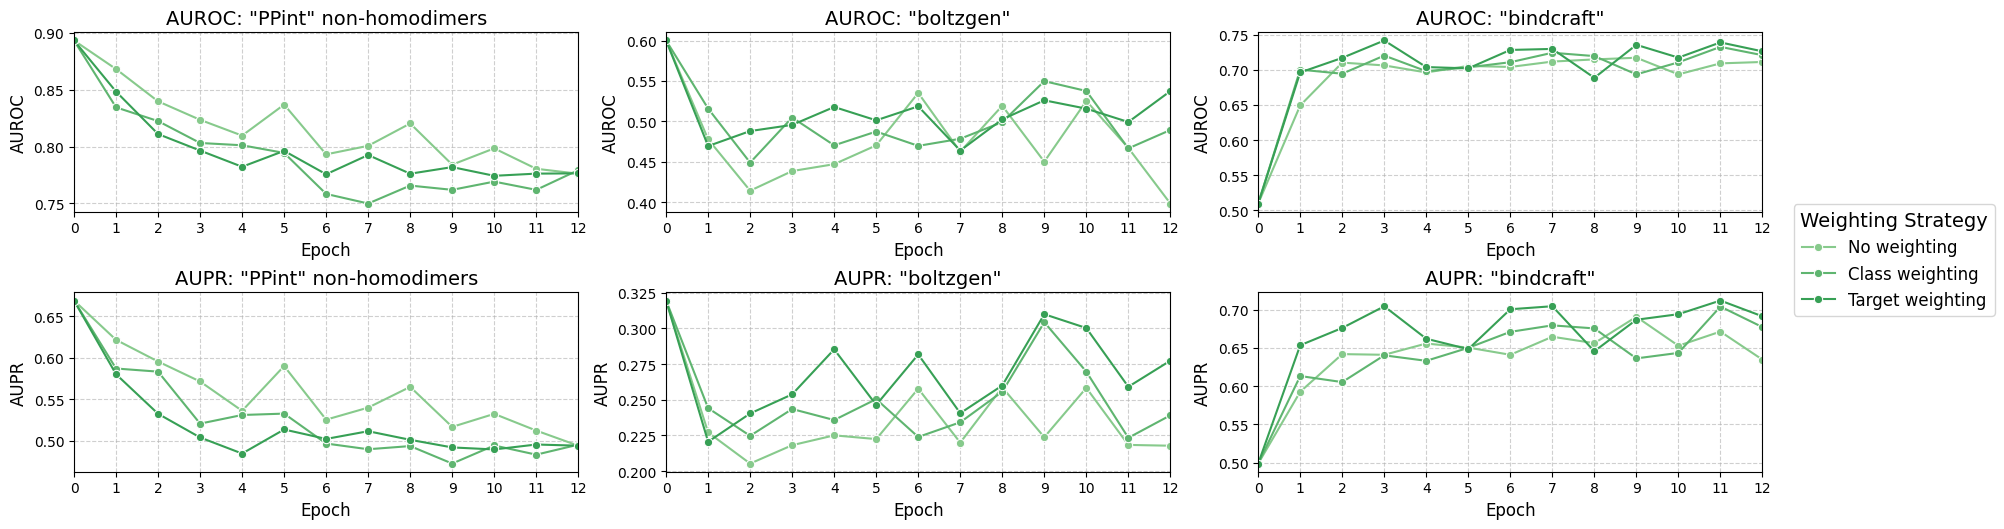

In [8]:
# Apply labeling
names = {
    "class_weighting" : "Class weighting",
    "target_weighting" : "Target weighting",
    "no_weighting": "No weighting"
}

Df['Strategy_Label'] = Df['strategy'].map(names)

# Create a 2x3 grid: Row 1 = AUROC, Row 2 = AUPR
fig, axes = plt.subplots(2, 3, figsize=(18, 6))

# Define the datasets (Columns)
datasets = [
    ('non_dimer', '"PPint" non-homodimers'),
    ('boltzgen', '"boltzgen"'),
    ('bindcraft', '"bindcraft"')
]

blue_palette = sns.color_palette("Greens_d", n_colors=5)

for col_idx, (prefix, title) in enumerate(datasets):
    
    # --- ROW 1: AUROC ---
    sns.lineplot(
        ax=axes[0, col_idx], data=Df, x='epoch', y=f'{prefix}_auroc', 
        hue='Strategy_Label', marker='o', errorbar='sd', err_kws={'alpha': 0.15},
        legend='brief', palette=blue_palette
    )
    axes[0, col_idx].set_title(f'AUROC: {title}', fontsize=14)
    axes[0, col_idx].set_ylabel("AUROC", fontsize=12)

    # Specific limits and ticks for Row 1 (AUROC)
    if title == "PPint non-homodimers":
        axes[0, col_idx].set_ylim(0.7, 1.0) # Example range
        axes[0, col_idx].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
    elif title == "boltzgen":
        axes[0, col_idx].set_ylim(0.30, 0.70)
        axes[0, col_idx].yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    elif title == "bindcraft":
        axes[0, col_idx].set_ylim(0.40, 0.80)
        axes[0, col_idx].yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        
    # Capture handles from the first column of the row
    if col_idx == 0:
        h1, l1 = axes[0, col_idx].get_legend_handles_labels()
    axes[0, col_idx].get_legend().remove()

    # --- ROW 2: AUPR ---
    sns.lineplot(
        ax=axes[1, col_idx], data=Df, x='epoch', y=f'{prefix}_aupr', 
        hue='Strategy_Label', marker='o', errorbar='sd', err_kws={'alpha': 0.15},
        legend='brief', palette=blue_palette
    )
    axes[1, col_idx].set_title(f'AUPR: {title}', fontsize=14)
    axes[1, col_idx].set_ylabel("AUPR", fontsize=12)
    
    # Specific limits and ticks for Row 2 (AUPR)
    if title == "PPint non-homodimers":
        axes[1, col_idx].set_ylim(0.40, 0.70)
        axes[1, col_idx].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
    elif title == "boltzgen":
        axes[1, col_idx].set_ylim(0.2, 0.40)
        axes[1, col_idx].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
    elif title == "bindcraft":
        axes[1, col_idx].set_ylim(0.4, 0.8)
        axes[1, col_idx].yaxis.set_major_locator(ticker.MultipleLocator(0.1))

    # Capture handles from the first column of the row
    if col_idx == 0:
        h2, l2 = axes[1, col_idx].get_legend_handles_labels()
    axes[1, col_idx].get_legend().remove()

# --- UNIFIED FORMATTING ---
for ax in axes.flat:
    ax.set_xlim(0, 12)
    ax.set_xticks(np.arange(0, 13))
    ax.set_xlabel("Epoch", fontsize = 12)
    ax.grid(True, linestyle='--', alpha=0.6)

# --- SHARED LEGEND ---
# Positioned at the bottom of the figure
fig.legend(h2, l2, loc='lower center', bbox_to_anchor=(1.06, 0.40), 
           ncol=1, title="Weighting Strategy", frameon=True, title_fontsize=14, fontsize=12)

plt.tight_layout(rect=[0, 0.05, 1, 0.95]) 
plt.subplots_adjust(hspace=0.45)

plt.savefig('metrics_organized_by_type.png', dpi=300, bbox_inches='tight')
plt.show()